In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# ANGELO DAVID PADILLA ROMERO_BOOTCAMP-IA_NIVEL-AVANZADO_TALENTOTECH - INSTRUCTOR: CRISTIAN CAMILO TIRADO CIFUENTES - 2024
# Usamos algunas imágenes del dataset del Punto 4 (https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification/data)
images_dir = "data/butterfly-dataset/train/"
images = ["Image_1.jpg", "Image_2.jpg", "Image_3.jpg", "Image_4.jpg", "Image_5.jpg"]
images_path = [os.path.join(images_dir, image) for image in images]
loaded_images = [cv2.imread(img) for img in images_path]

# Convertir las imágenes de BGR (formato de OpenCV) a RGB (para visualización)
images_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in loaded_images]

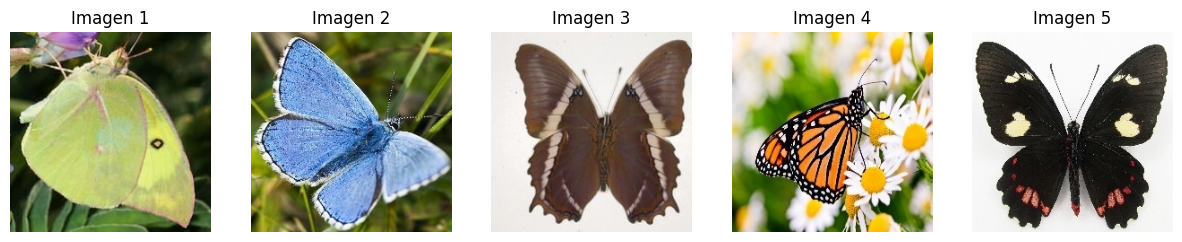

In [ ]:
# Función para mostrar imágenes lado a lado
def show_images(images, titles=None):
    plt.figure(figsize=(15, 10))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        if titles:
            plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Mostrar imagenes originales
show_images(images_rgb, titles=[f"Imagen {i+1}" for i in range(5)])

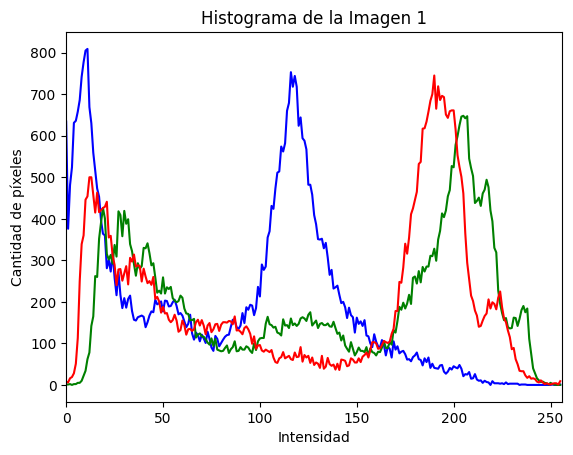

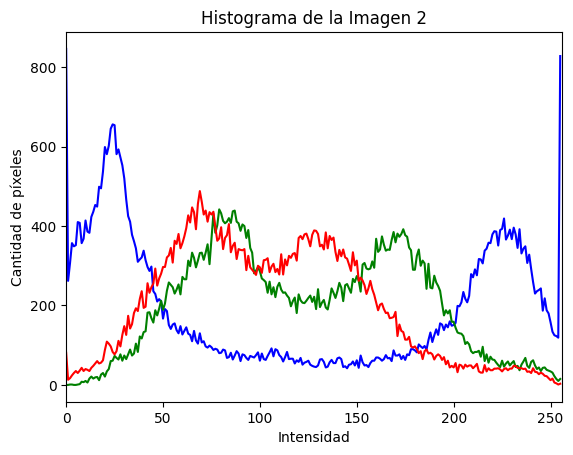

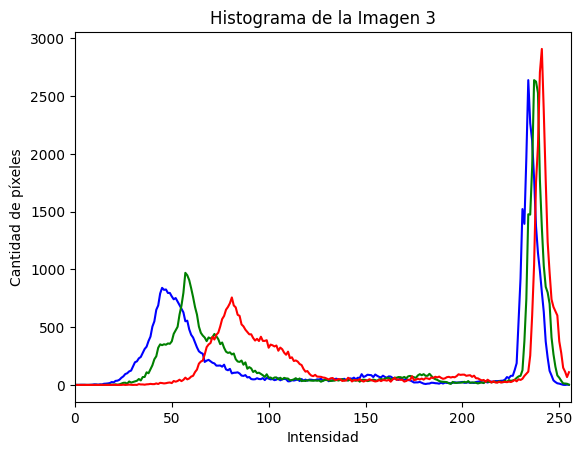

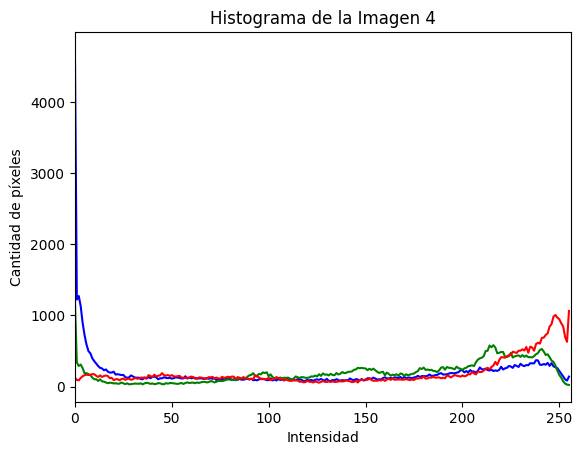

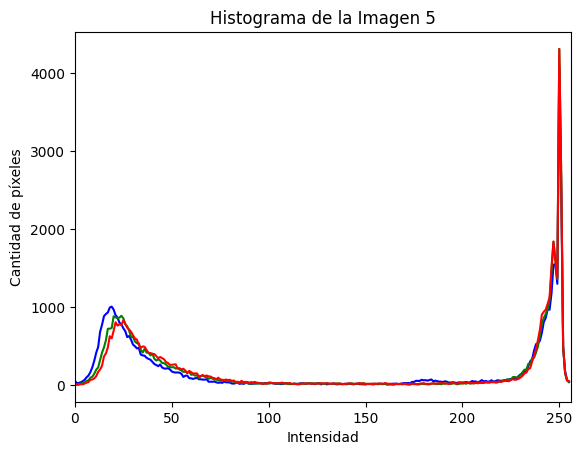

In [ ]:
# 1. Histograma para analizar la intensidad de los colores RGB
for i, img in enumerate(loaded_images):
    chans = cv2.split(img)  # Separar los canales de color (B, G, R)
    colors = ('b', 'g', 'r')
    plt.figure()
    plt.title(f"Histograma de la Imagen {i+1}")
    plt.xlabel("Intensidad")
    plt.ylabel("Cantidad de píxeles")
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.show()

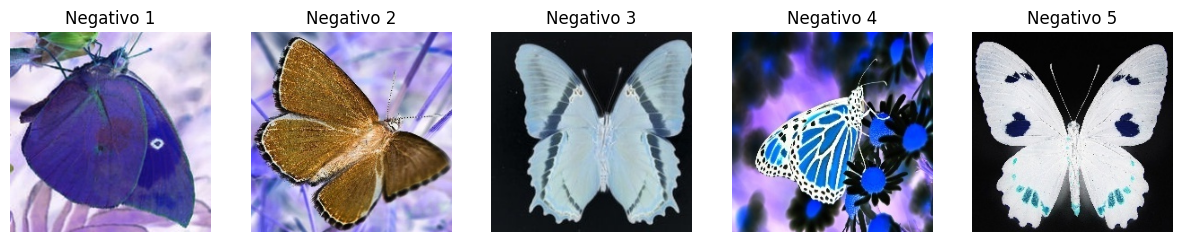

In [ ]:
# 2. Obtener el negativo de cada imagen
negatives = [cv2.bitwise_not(img) for img in images_rgb]
show_images(negatives, titles=[f"Negativo {i+1}" for i in range(5)])

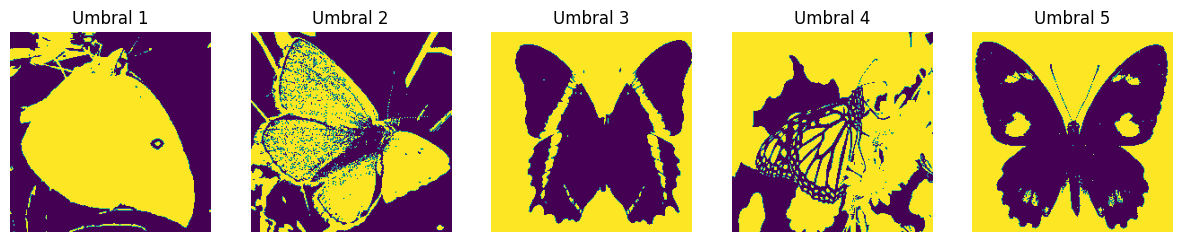

In [ ]:
# 3. Obtener el umbral de cada imagen
thresholded_images = []
for img in loaded_images:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY)
    thresholded_images.append(thresh)
show_images(thresholded_images, titles=[f"Umbral {i+1}" for i in range(5)])

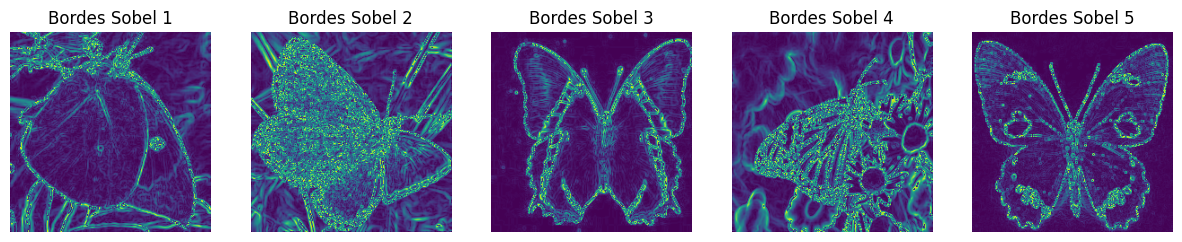

In [ ]:
# 4. Obtener los bordes de las imágenes (Sobel)
sobel_images = []
for img in loaded_images:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)  # Borde en dirección x
    sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)  # Borde en dirección y
    sobel = cv2.magnitude(sobelx, sobely)  # Magnitud del gradiente
    sobel_images.append(np.uint8(sobel))
show_images(sobel_images, titles=[f"Bordes Sobel {i+1}" for i in range(5)])

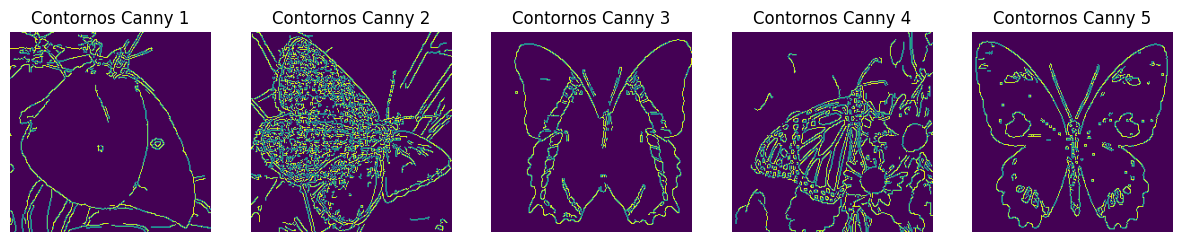

In [ ]:
# 5. Detección de contornos con Canny
canny_images = []
for img in loaded_images:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_img, 100, 200)  # Detección de bordes con Canny
    canny_images.append(edges)
show_images(canny_images, titles=[f"Contornos Canny {i+1}" for i in range(5)])